# Capstone project - The battle of neighbourhoods

## Introduction and business problem

#### Introduction
Toronto is the provincial capital of Ontario. With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. The Greater Toronto Area (GTA) as a whole had a 2016 population of 6,417,516. The city covers an area of 630.20 square kilometres (243.32 sq mi) and comprises six districts – East York, Etobicoke, North York, Old Toronto, Scarborough and York – which were amalgamated to form Toronto's present boundaries in 1998. The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.
The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority population group, and over 200 distinct ethnic origins are represented among its inhabitants. While the majority of Torontonians speak English as their primary language, over 160 languages are spoken in the city.

#### Business Problem

With its excellent business opportunities and diverse cosmopolitan culture, Toronto attract a lot of expats who come to the city for employment. Any new expat to the city would be looking to rent an apartment for living and staying.
A person looking to rent an apartment focusses on few things like rent amount, transportation, stores, entertainment options etc. So, as part of this project, we will list and visualize all major apartments/condos in the city of Toronto that are available for rent. We will cluster the neighbourhoods in order to recommend venues so that a prospective tenant can take an informed decision.

#### Assumption
1. The person is looking for 2-bedroom apartments only.
2. The apartment should be close to public transport.
3. There should be grocery and dining options available near the apartment.

## Part 1  - Webscraping and importing of data into a dataframe

### Import standard libraries

In [620]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Import BeautifulSoup for web scraping

In [621]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#import urllib2

### Get RentCafe data - we will take data from the first 3 pages only for the purpose of this project

In [622]:
#RentCafe has 4 pages of data for 1 and 2 bedroom apartments, we will get the first page here
url = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url)
soup_01 = BeautifulSoup(html, 'lxml')
type(soup_01)

bs4.BeautifulSoup

In [623]:
#Get the second page of RentCafe data
url1 = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo&page=2', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url1)
soup_02 = BeautifulSoup(html, 'lxml')
type(soup_02)

bs4.BeautifulSoup

In [624]:
#Get the second page of RentCafe data
url1 = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo&page=3', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url1)
soup_03 = BeautifulSoup(html, 'lxml')
type(soup_03)

bs4.BeautifulSoup

#### Extract the apartment names from the webdata collected so far

In [625]:
mylink_01 = soup_01.find_all('h2')
length_mylink = len(mylink_01)
Apartment_Names=[]
for i in range(length_mylink):
    temp = mylink_01[i].attrs['title']
    Apartment_Names.append(temp)
mylink_02 = soup_02.find_all('h2')
length_mylink = len(mylink_02)
for i in range(length_mylink):
    temp = mylink_02[i].attrs['title']
    Apartment_Names.append(temp)    
mylink_03 = soup_03.find_all('h2')
length_mylink = len(mylink_03)
for i in range(length_mylink):
    temp = mylink_03[i].attrs['title']
    Apartment_Names.append(temp)        
#Apartment_Names

#### Extract the price of each apartment from the webdata collected so far

In [626]:
heds_01 = soup_01.find_all('div',class_ = 'price')
Apartment_Rent_Low = []
Apartment_Rent_High = []
length_heds = len(heds_01)
for h in range(length_heds):
    try:
        temp = heds_01[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
heds_02 = soup_02.find_all('div',class_ = 'price')  
length_heds = len(heds_02)
for h in range(length_heds):
    try:
        temp = heds_02[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
heds_03 = soup_03.find_all('div',class_ = 'price')  
length_heds = len(heds_03)
for h in range(length_heds):
    try:
        temp = heds_03[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
        
#
length_heds = len(heds_01)
for h in range(length_heds):
    try:
        temp = heds_01[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')
length_heds = len(heds_02)
for h in range(length_heds):
    try:
        temp = heds_02[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')        
length_heds = len(heds_03)
for h in range(length_heds):
    try:
        temp = heds_03[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')                
#Apartment_Rent_High

#### Extract the street address of each apartment name from the webdata collected so far

In [627]:
heds_a_01 = soup_01.find_all('span',class_ = 'building-address')
length_mylink_01 = len(heds_a_01)
Apartment_Street=[]
for i in range(length_mylink_01):
    temp = heds_a_01[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)
heds_a_02 = soup_02.find_all('span',class_ = 'building-address')
length_mylink_02 = len(heds_a_02)
for i in range(length_mylink_02):
    temp = heds_a_02[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)    
heds_a_03 = soup_03.find_all('span',class_ = 'building-address')
length_mylink_03 = len(heds_a_03)
for i in range(length_mylink_03):
    temp = heds_a_03[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)        
#Apartment_Street

#### Extract the postal code of the apartment from the webdata collected so far

In [628]:
Apartment_PostalCode=[]
for i in range(length_mylink_01):
    temp = heds_a_01[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)
for i in range(length_mylink_02):
    temp = heds_a_02[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)
for i in range(length_mylink_03):
    temp = heds_a_03[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)    
#Apartment_PostalCode

#### Combine all the webdata collected so far into a dataframe

In [629]:
apartment_info = pd.DataFrame(
                             {'Apt_Name':Apartment_Names,
                             'Apt_Street':Apartment_Street,
                             'Rent_Low': Apartment_Rent_Low,
                             'Rent_High': Apartment_Rent_High,
                             'PostalCode': Apartment_PostalCode
                             })
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,PostalCode
0,Cambridge Place Apartments,30 Denton Ave,1775,2475,M1L 4P2
1,Main Square,2575 Danforth Avenue,1545,2420,M4C 1L5
2,Kelvingrove Apartments,6 Airdrie Road,1650,2250,M4G 1L7
3,VIA123,123 Parkway Forest Dr.,2450,2947,M2J 0G1
4,The Montgomery,25 Montgomery Ave.,2070,4770,M4R 0A1


#### Process and transform the data

In [630]:
# Drop all records that do not have a price
apartment_info = apartment_info.drop(apartment_info[(apartment_info.Rent_Low == 'None') & (apartment_info.Rent_High == 'None')].index)
# For records where either the High or Low rent is misisng, replace it with Low/High as applicable
apartment_info['Rent_High'] = np.where(apartment_info.Rent_High == '',apartment_info.Rent_Low,apartment_info.Rent_High)
apartment_info['Rent_Low'] = np.where(apartment_info.Rent_Low == '',apartment_info.Rent_High,apartment_info.Rent_Low)
apartment_info = apartment_info.reset_index(drop=True)
# Convert datatype of price to integer and calculate the average rent
apartment_info['Rent_Low'] = apartment_info['Rent_Low'].astype(str).astype(int)
apartment_info['Rent_High'] = apartment_info['Rent_High'].astype(str).astype(int)
apartment_info['Rent_Avg'] = apartment_info[['Rent_Low', 'Rent_High']].mean(axis=1).round().astype(int)
#Sort the data and create a new column with the postal code prefix, also rename the PostalCode column
apartment_info = apartment_info.sort_values("PostalCode", axis=0, ascending=True)
apartment_info = apartment_info.reset_index(drop=True)
apartment_info['PostalCode_Prefix'] = apartment_info['PostalCode'].str.slice(0,3)
apartment_info  = apartment_info.rename(columns = {'PostalCode':'Postal_Code'}) 
apartment_info['Apt_Street'] = apartment_info['Apt_Street'].astype(str)
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,PostalCode_Prefix
0,Cambridge Place Apartments,30 Denton Ave,1775,2475,M1L 4P2,2125,M1L
1,2560 Kingston,2560 Kingston Rd,1649,1869,M1M 1L8,1759,M1M
2,2550 Kingston,2550 Kingston Rd,1589,2469,M1M 1L8,2029,M1M
3,Queen Street East,3008-3010 Queen Street East,2400,2400,M1N 1A4,2400,M1N
4,2440 Queen Street East,2440 Queen Street East,2100,2400,M1N 1A5,2250,M1N


## Get Wikipedia Data for Toronto to extract the boroughs and neighbourhoods

#### Get HTML text data from the webpage, cleanup and copy it into a dataframe

In [631]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [632]:
rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td')

In [633]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()

In [634]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

In [635]:
df = pd.DataFrame(list_rows)

#### Further cleanup of the data to remove special chars, space etc

In [636]:
df1 = df[0].str.split('\n', expand=True)
df1[0] = df1[0].str.strip('[')
df1[2] = df1[2].str.strip(']')
df1[3] = df1[3].str.strip(']')
df1 =df1.drop(df1.columns[3:], axis = 1)
df1[1] = df1[1].str.lstrip(',')
df1[2] = df1[2].str.lstrip(',')
#Remove leading spaces
df1[0] = df1[0].str.strip()
df1[1] = df1[1].str.strip()
df1[2] = df1[2].str.strip()
df1 = df1.iloc[1:]

#### Get the table headers and clean up the header data

In [637]:
col_labels = soup.find_all('th')

In [638]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Postal Code\n, Borough\n, Neighborhood\n, Canadian postal codes\n]']


In [639]:
df2 = pd.DataFrame(all_header)
df2 = df2.replace('\n','', regex=True)
df2.head()

,0
0,"[Postal Code, Borough, Neighborhood, Canadian ..."


In [640]:
df2 = df2[0].str.split(',', expand=True)
df2[0] = df2[0].str.strip('[')
df2[1] = df2[1].str.strip()
df2[2] = df2[2].str.strip()

#### Concatenate the header and text data, do some more data cleanup

In [641]:
frames = [df2,df1]
df3 = pd.concat(frames)

In [642]:
df3 = df3.rename(columns=df2.iloc[0])
df3 =df3.drop(df3.columns[[3]], axis = 1)
df3 = df3.rename(columns={'Postal Code':'PostalCode'})

In [643]:
postal_code_df = df3.iloc[1:]
list(postal_code_df.columns)

['PostalCode', 'Borough', 'Neighborhood']

#### Remove records where Borough is 'Not assigned', also check for Neighborhood where it is 'Not assigned' and replace with Borough data

In [644]:
postal_code_df = postal_code_df[postal_code_df['Borough'] != 'Not assigned']
postal_code_df = postal_code_df.reset_index(drop=True)

#### Keep records only with valid postal code

In [645]:
postal_code_df = postal_code_df[postal_code_df.PostalCode.str[0] == 'M']

In [646]:
postal_code_df['Neighborhood'] = np.where(postal_code_df['Neighborhood'] == 'Not assigned', postal_code_df['Borough'], postal_code_df['Neighborhood'])

In [647]:
postal_code_df.columns[postal_code_df.isna().any()].tolist()

[]

### Get the shape of the final dataframe

In [648]:
#postal_code_df.shape
postal_code_df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## Part 2 - Get the latitude, longitude for each postal code in the dataframe

#### Get the GeoSpatial data

In [649]:
import requests # library to handle requests
!wget -q -O 'geospatial_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [650]:
geospatial_data_df = pd.read_csv('geospatial_data.csv')
geospatial_data_df = geospatial_data_df.rename(columns={'Postal Code':'PostalCode'})
geospatial_data_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge the latitude, longitude with the postal code dataframe

In [651]:
postal_code_with_latlong_df = pd.merge(left=postal_code_df, right=geospatial_data_df, how='left', left_on='PostalCode', right_on='PostalCode')
#postal_code_with_latlong_df.head()

In [652]:
postal_code_with_latlong_df.columns[postal_code_with_latlong_df.isna().any()].tolist()

[]

In [653]:
postal_code_with_latlong_df = postal_code_with_latlong_df.dropna()

In [654]:
postal_code_with_latlong_df.shape

(103, 5)

In [655]:
neighborhoods = postal_code_with_latlong_df
#neighborhoods.head(10)

In [656]:
neighborhoods = neighborhoods.sort_values("PostalCode", axis=0, ascending=True)
neighborhoods = neighborhoods.reset_index(drop=True)
#neighborhoods.head()

### Merge the neighbourhoods data into the apartment info dataframe and cleanup data

In [657]:
apartment_info = pd.merge(left=apartment_info, right=neighborhoods, how='left', left_on='PostalCode_Prefix', right_on='PostalCode')
apartment_info = apartment_info.rename(columns = {'Borough_y':'Borough','Neighborhood_y':'Neighborhood','Latitude_y':'Latitude','Longitude_y':'Longitude'})
#neighborhoods
apartment_info = apartment_info.drop(apartment_info.columns[[6,7]],axis=1)
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude
0,Cambridge Place Apartments,30 Denton Ave,1775,2475,M1L 4P2,2125,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
1,2560 Kingston,2560 Kingston Rd,1649,1869,M1M 1L8,1759,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
2,2550 Kingston,2550 Kingston Rd,1589,2469,M1M 1L8,2029,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
3,Queen Street East,3008-3010 Queen Street East,2400,2400,M1N 1A4,2400,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848
4,2440 Queen Street East,2440 Queen Street East,2100,2400,M1N 1A5,2250,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Get Apartment Registration data from the City of Toronto website; the  excel data was downloaded from this site and will be used below
#### https://open.toronto.ca/dataset/apartment-building-registration/

In [658]:
apartment_reg_df = pd.read_csv('Apartment Building Registration Data.csv')
apartment_reg_df = apartment_reg_df[['_id','EXTERIOR_FIRE_ESCAPE','FIRE_ALARM','GARBAGE_CHUTES','BIKE_PARKING','BARRIER_FREE_ACCESSIBILTY_ENTR',
                                     'LOCKER_OR_STORAGE_ROOM','PETS_ALLOWED','SITE_ADDRESS','VISITOR_PARKING','YEAR_BUILT',
                                     'NO_OF_STOREYS','IS_THERE_EMERGENCY_POWER?','NON-SMOKING_BUILDING','NO_OF_ACCESSIBLEPARKING_SPACES',
                                     'NO_BARRIERFREE_ACCESSBLE_UNITS']]
apartment_reg_df.head()

,_id,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,BARRIER_FREE_ACCESSIBILTY_ENTR,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,17269,NO,YES,NO,Not Available,NO,NO,NO,1157 O'CONNOR DR,UNAVAILABLE,1953.0,3,NO,YES,6.0,0.0
1,17270,NO,YES,NO,0 indoor parking spots and 8 outdoor parking s...,NO,NO,YES,983 KINGSTON RD,UNAVAILABLE,1925.0,3,NO,YES,0.0,0.0
2,17271,NO,YES,YES,Not Available,YES,YES,NO,15 ROEHAMPTON AVE,PAID,2019.0,36,YES,YES,2.0,0.0
3,17272,NO,YES,NO,Not Available,NO,YES,YES,1981 DUNDAS ST E,FREE,1958.0,3,NO,YES,13.0,0.0
4,17273,NO,YES,YES,0 indoor parking spots and 15 outdoor parking ...,YES,NO,YES,2431 FINCH AVE W,BOTH,1959.0,6,NO,NO,0.0,0.0


In [659]:
# Convert street addresses into lowercase and separate the house number and the string part of the street address for fuzzy match (which can match strings only)
apartment_info['Apt_Street_Lower'] = apartment_info['Apt_Street'].str.lower()
apartment_info = (apartment_info.assign(Apt_Street_Lower_num=apartment_info["Apt_Street_Lower"].str.extract(r"(\d+\.\d+|\d+)"))
                                             .assign(Apt_Street_Lower_Str=apartment_info["Apt_Street_Lower"].str.replace(r"(\d+\.\d+|\d+)","")))
apartment_info_sorted_temp = apartment_info.sort_values("Apt_Street_Lower_Str", axis=0, ascending=True)
apartment_info_sorted = apartment_info_sorted_temp.reset_index(drop=True)
apartment_info_sorted.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Apt_Street_Lower,Apt_Street_Lower_num,Apt_Street_Lower_Str
0,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,345 lonsdale road,345,lonsdale road
1,Kelvingrove Apartments,6 Airdrie Road,1650,2250,M4G 1L7,1950,East York,Leaside,43.709060,-79.363452,6 airdrie road,6,airdrie road
2,Village Green Community - 50,50 Alexander Street,1900,1900,M4Y 1B5,1900,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,50 alexander street,50,alexander street
3,Village Green Community - 40,40 Alexander Street,1895,2585,M4Y 1B5,2240,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,40 alexander street,40,alexander street
4,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,143 and 145 arlington avenue,143,and arlington avenue


In [660]:
# Same process as above for the reg dataset in order to perform the fuzzy search
apartment_reg_df['Apt_Street_Lower_Reg'] = apartment_reg_df['SITE_ADDRESS'].str.lower()
apartment_reg_df = (apartment_reg_df.assign(Apt_Street_Lower_Reg_num=apartment_reg_df["Apt_Street_Lower_Reg"].str.extract(r"(\d+\.\d+|\d+)"))
                                    .assign(Apt_Street_Lower_Reg_Str=apartment_reg_df["Apt_Street_Lower_Reg"].str.replace(r"(\d+\.\d+|\d+)","")))
#apartment_info_sorted_temp = apartment_info.sort_values("Apt_Street_Lower_Str", axis=0, ascending=True)
apartment_reg_df_temp = apartment_reg_df.sort_values("Apt_Street_Lower_Reg_Str", axis=0, ascending=True)
apartment_reg_df_sorted = apartment_reg_df_temp.reset_index(drop=True)
apartment_reg_df_sorted.head()

,_id,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,BARRIER_FREE_ACCESSIBILTY_ENTR,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS,Apt_Street_Lower_Reg,Apt_Street_Lower_Reg_num,Apt_Street_Lower_Reg_Str
0,20106,NO,YES,YES,Not Available,YES,NO,YES,140 ADANAC DR,BOTH,1970.0,16,YES,YES,6.0,1.0,140 adanac dr,140,adanac dr
1,19221,NO,YES,YES,Not Available,NO,NO,YES,90 ADELAIDE ST E,UNAVAILABLE,1980.0,8,YES,NO,0.0,0.0,90 adelaide st e,90,adelaide st e
2,19239,NO,YES,YES,Not Available,YES,YES,YES,501 ADELAIDE ST E,PAID,2009.0,13,YES,YES,3.0,4.0,501 adelaide st e,501,adelaide st e
3,19447,NO,YES,YES,Not Available,YES,NO,YES,552 ADELAIDE ST W,UNAVAILABLE,2005.0,5,YES,NO,0.0,0.0,552 adelaide st w,552,adelaide st w
4,17465,YES,YES,YES,Not Available,YES,NO,YES,800 ADELAIDE ST W,UNAVAILABLE,1987.0,3,NO,NO,0.0,4.0,800 adelaide st w,800,adelaide st w


#### Perform Fuzzy search to match the addresses of the two dataframes as that is the only common column between the two.

In [661]:
import pandas as pd
import fuzzy_pandas as fpd

df1 = apartment_info_sorted
df2 = apartment_reg_df_sorted
# Fuzzy match the string portion of the addresses of the two dataframes
df_combined = fpd.fuzzy_merge(df1, df2,
            left_on='Apt_Street_Lower_Str',
            right_on='Apt_Street_Lower_Reg_Str',
            ignore_case=True,
            method='levenshtein',
            threshold=0.8)

df_combined.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS,Apt_Street_Lower_Reg,Apt_Street_Lower_Reg_num,Apt_Street_Lower_Reg_Str
0,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1930.0,4,NO,NO,1.0,0.0,323 lonsdale rd,323,lonsdale rd
1,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1923.0,4,YES,NO,0.0,0.0,316 lonsdale rd,316,lonsdale rd
2,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1957.0,6,YES,NO,0.0,0.0,340 lonsdale rd,340,lonsdale rd
3,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1920.0,5,NO,NO,0.0,0.0,321 lonsdale rd,321,lonsdale rd
4,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1927.0,4,NO,YES,0.0,0.0,312 lonsdale rd,312,lonsdale rd


#### Since Fuzzy match was performed on the string part of address, it would result in a lot of false positives. We need to match the house number of both dataframes and only keep records that have a match. Those records are true positives.

In [662]:
apartment_info_combined_info = df_combined[df_combined['Apt_Street_Lower_Reg_num'] == df_combined['Apt_Street_Lower_num']]

#### Add empty columns(columns in the reg dataframe) to the apartment info dataframe, merge both frames and drop duplicates

In [663]:
#Get all the columns of df2 (Apartment Registered Dataframe)
df2_cols_list  = df2.columns.tolist()
#Add these empty columns to df1 (Apartment Info)
df1 = df1.reindex(columns=[*df1.columns.tolist(), *df2_cols_list], fill_value='')
#df1_cols_list = df1.columns.tolist()
# Merge the two dataframes together
apartment_info_combined_info = pd.concat([df1,apartment_info_combined_info],axis=0)
# Remove duplicates, for duplicates keep the one that has the apartment registered info
apartment_info_combined_info = apartment_info_combined_info.drop_duplicates(subset=['Apt_Name'], keep='last').reset_index(drop=True)
# Drop unnecessary and temporary columns
apartment_info_combined_info = apartment_info_combined_info.drop([ 'Apt_Street_Lower', 'Apt_Street_Lower_num', 'Apt_Street_Lower_Str', '_id', 'Apt_Street_Lower_Reg', 'Apt_Street_Lower_Reg_num', 'Apt_Street_Lower_Reg_Str'], axis=1)


### Now we will show some charts that analyses the data and displays salient features for the apartments

#### Display the 10 apartments by average rent ranking from low to High

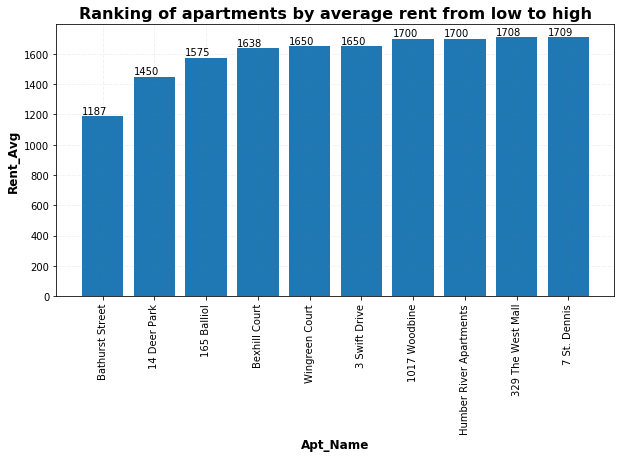

In [664]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_avg = apartment_info_combined_info[['Apt_Name', 'Rent_Avg']]
temp_df_rent_avg = temp_df_rent_avg.sort_values('Rent_Avg', axis = 0, ascending = True).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:9]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['Rent_Avg']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("Rent_Avg",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments by average rent from low to high',fontsize= 16,weight="bold")
plt.show()

#### Display the 10 apartments by average rent ranking from High to Low

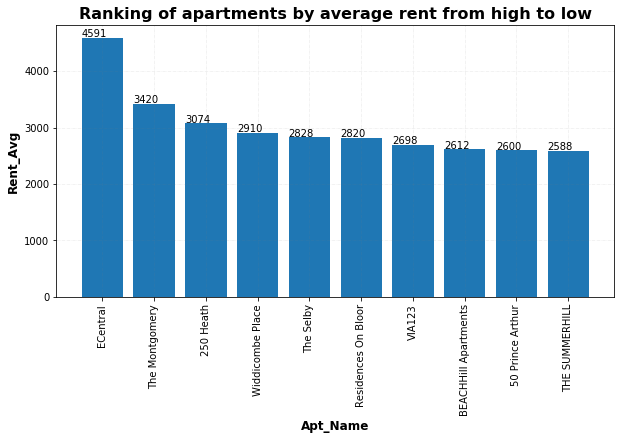

In [665]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_avg = apartment_info_combined_info[['Apt_Name', 'Rent_Avg']]
temp_df_rent_avg = temp_df_rent_avg.sort_values('Rent_Avg', axis = 0, ascending = False).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:9]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['Rent_Avg']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("Rent_Avg",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments by average rent from high to low',fontsize= 16,weight="bold")
plt.show()

#### Display the lowest and highest priced apartments

In [718]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_low = apartment_info_combined_info[['Apt_Name', 'Rent_Low']]
temp_df_rent_low = temp_df_rent_low.sort_values('Rent_Low', axis = 0, ascending = True).reset_index(drop=True)
temp_df_rent_low = temp_df_rent_low.loc[:4]
temp_df_rent_low

,Apt_Name,Rent_Low
0,Bathurst Street,1099
1,14 Deer Park,1450
2,Bexhill Court,1525
3,Main Square,1545
4,7 St. Dennis,1549


In [719]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_high = apartment_info_combined_info[['Apt_Name', 'Rent_High']]
temp_df_rent_high = temp_df_rent_high.sort_values('Rent_High', axis = 0, ascending = False).reset_index(drop=True)
temp_df_rent_high = temp_df_rent_high.loc[:4]
temp_df_rent_high

,Apt_Name,Rent_High
0,ECentral,7360
1,The Montgomery,4770
2,Residences On Bloor,3877
3,The Selby,3515
4,Widdicombe Place,3495


#### Display top 5 apartments with accessible parking spaces

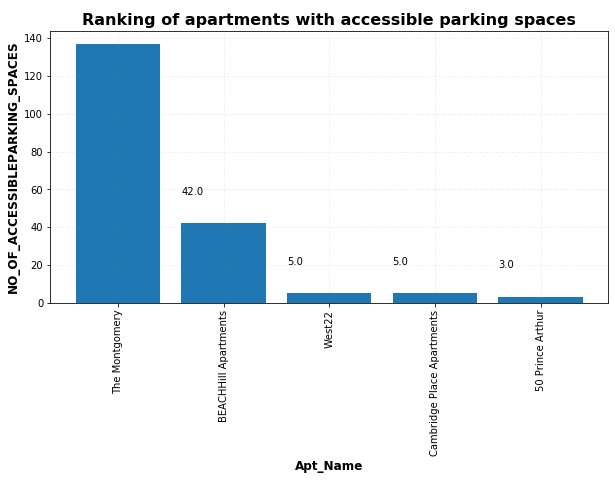

In [666]:
temp_df_rent_avg = apartment_info_combined_info.loc[:,('Apt_Name', 'NO_OF_ACCESSIBLEPARKING_SPACES')]
temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'] = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'].apply(lambda x: 0.0 if x == '' else x)
temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'] = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'].astype(float)
temp_df_rent_avg = temp_df_rent_avg.sort_values('NO_OF_ACCESSIBLEPARKING_SPACES', axis = 0, ascending = False).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:4]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("NO_OF_ACCESSIBLEPARKING_SPACES",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments with accessible parking spaces',fontsize= 16,weight="bold")
plt.show()

#### Display apartments that have an exterior fireescape and fire alarm

In [667]:
temp_df_rent = apartment_info_combined_info.loc[:,('Apt_Name',  'EXTERIOR_FIRE_ESCAPE', 'FIRE_ALARM')]
temp_df_rent = temp_df_rent.loc[(temp_df_rent['EXTERIOR_FIRE_ESCAPE'] >= 'YES') | (temp_df_rent['FIRE_ALARM'] >= 'YES')]
temp_df_rent_fire = temp_df_rent.reset_index(drop=True)
temp_df_rent_fire

,Apt_Name,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM
0,345 Lonsdale,NO,YES
1,Bathurst Street,NO,YES
2,140 Carlton,NO,YES
3,Cambridge Place Apartments,NO,YES
4,West22,NO,YES
5,2560 Kingston,NO,YES
6,2550 Kingston,NO,YES
7,The Montgomery,YES,YES
8,VIA123,NO,YES
9,50 Prince Arthur,NO,YES


## Part 3 -  Clustering of neighborhoods for 'Toronto' boroughs

### Install folium and geopy

In [668]:
pip install folium

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: MarkupSafe>=0.23 in c:\programdata\anaconda3\lib\site-packages (from jinja2>=2.9->folium) (1.1.1)



In [669]:
pip install geopy

### Import necessary packages

In [670]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Create map of Toronto for the selected boroughs and neighborhoods

In [671]:
address = 'Toronto City, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [672]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(apartment_info_combined_info['Latitude'], apartment_info_combined_info['Longitude'], apartment_info_combined_info['Borough'], apartment_info_combined_info['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [673]:
CLIENT_ID = 'FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U' # your Foursquare ID
CLIENT_SECRET = 'M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U
CLIENT_SECRET:M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4


In [674]:
#toronto_data = neighborhoods[neighborhoods['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data = apartment_info_combined_info
toronto_data.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,Kelvingrove Apartments,6 Airdrie Road,1650,2250,M4G 1L7,1950,East York,Leaside,43.709060,-79.363452,...,,,,,,,,,,
1,Village Green Community - 50,50 Alexander Street,1900,1900,M4Y 1B5,1900,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,,,,,,,,,,
2,Village Green Community - 40,40 Alexander Street,1895,2585,M4Y 1B5,2240,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,,,,,,,,,,
3,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,...,,,,,,,,,,
4,South Algiers,565 Avenue Road,1945,2475,M4V 2J9,2210,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,,,,,,,,,,


In [675]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_data['Borough'].unique()),
        toronto_data.shape[0]
    )
)

The dataframe has 9 boroughs and 59 neighborhoods.


### Get the count of the number of apartments in each neighbourhood and plot the top 15 on a chart

In [676]:
toronto_data_neighbourhoods = toronto_data
toronto_data_neighbourhoods = toronto_data.groupby('Neighborhood').count()
toronto_data_neighbourhoods = toronto_data_neighbourhoods.sort_values('Apt_Name', axis = 0, ascending = False)
toronto_data_neighbourhoods = toronto_data_neighbourhoods.reset_index(level=0)
toronto_data_neighbourhoods = toronto_data_neighbourhoods.loc[:,('Neighborhood', 'Apt_Name')]
toronto_data_neighbourhoods.head()

,Neighborhood,Apt_Name
0,Davisville,8
1,Church and Wellesley,4
2,"Summerhill West, Rathnelly, South Hill, Forest...",4
3,"Forest Hill North &amp; West, Forest Hill Road...",3
4,Don Mills,3


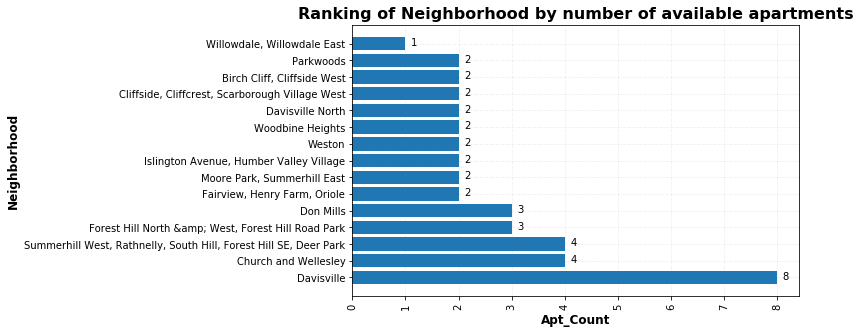

In [677]:
toronto_data_neighbourhoods_temp = toronto_data_neighbourhoods.loc[:14]
# Now plot the above data to create a bar chart
x = toronto_data_neighbourhoods_temp['Neighborhood']
y = toronto_data_neighbourhoods_temp['Apt_Name']
fig, ax = plt.subplots(figsize = (8, 5))
ax.barh(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Count", weight='bold',fontsize=12)
plt.ylabel("Neighborhood",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    height, width = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x + height + 0.1, y + width - 0.5))
ax.set_title('Ranking of Neighborhood by number of available apartments',fontsize= 16,weight="bold")
plt.show()

### Explore the first neighborhood in our dataframe.

In [678]:
toronto_data.loc[0, 'Neighborhood']

'Leaside'

In [679]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Leaside are 43.7090604, -79.3634517.


   #### Now, let's get the top 100 venues that are in Leaside within a radius of 500 meters. 
   #### Create the FourSquare URL first and then call it to get the results.

In [680]:
radius = 500
LIMIT =  100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U&client_secret=M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4&v=20180605&ll=43.7090604,-79.3634517&radius=500&limit=100'

In [681]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f06037b3f71e168d2176593'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Leaside',
  'headerFullLocation': 'Leaside, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 32,
  'suggestedBounds': {'ne': {'lat': 43.7135604045, 'lng': -79.3572380270639},
   'sw': {'lat': 43.704560395499996, 'lng': -79.3696653729361}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5531956d498e24c6e9994f2e',
       'name': 'Local Leaside',
       'location': {'address': '180 Laird Dr',
        'lat': 43.71001166793114,
        'lng': -79.36351433524794,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.71001166793114,
    

#### Use the get_category_type function to get the category of each venue

In [682]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Clean the json data and put it into a dataframe

In [683]:
from pandas import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Local Leaside,Sports Bar,43.710012,-79.363514
1,Rack Attack,Sporting Goods Shop,43.706934,-79.362261
2,LCBO,Liquor Store,43.710571,-79.360287
3,Olde Yorke Fish & Chips,Fish & Chips Shop,43.706141,-79.361829
4,CrossFit Toronto,Gym,43.708100,-79.359060


In [684]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

32 venues were returned by Foursquare.


### Explore the neighborhooods in Toronto for the apartments shortlisted so far

In [685]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [686]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'].unique(),
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])
                                 

Leaside
Church and Wellesley
Humewood-Cedarvale
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Davisville
Bayview Village
Islington Avenue, Humber Valley Village
Rosedale
Davisville North
Parkwoods
University of Toronto, Harbord
Woodbine Heights
Willowdale, Willowdale East
Don Mills
Forest Hill North &amp; West, Forest Hill Road Park
Moore Park, Summerhill East
Weston
High Park, The Junction South
Birch Cliff, Cliffside West
Willowdale, Willowdale West
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Victoria Village
Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens
Downsview
Lawrence Manor, Lawrence Heights
Regent Park, Harbourfront
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
The Beaches


#### Check how many venues were returned for each neighborhood

In [687]:
print(toronto_venues.shape)
toronto_venues.head()

(762, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Leaside,43.70906,-79.363452,Local Leaside,43.710012,-79.363514,Sports Bar
1,Leaside,43.70906,-79.363452,Rack Attack,43.706934,-79.362261,Sporting Goods Shop
2,Leaside,43.70906,-79.363452,LCBO,43.710571,-79.360287,Liquor Store
3,Leaside,43.70906,-79.363452,Olde Yorke Fish & Chips,43.706141,-79.361829,Fish & Chips Shop
4,Leaside,43.70906,-79.363452,CrossFit Toronto,43.708100,-79.359060,Gym


In [688]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",23,23,23,23,23,23
Bayview Village,37,37,37,37,37,37
"Birch Cliff, Cliffside West",34,34,34,34,34,34
Church and Wellesley,77,77,77,77,77,77
"Cliffside, Cliffcrest, Scarborough Village West",27,27,27,27,27,27
Davisville,17,17,17,17,17,17
Don Mills,7,7,7,7,7,7
Downsview,1,1,1,1,1,1
"Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood",2,2,2,2,2,2


In [689]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 121 uniques categories.


#### Analyze each neighborhood

In [690]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,...,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant,Yoga Studio
0,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [691]:
toronto_onehot.shape

(762, 122)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [692]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_grouped.dtypes
toronto_grouped.head()

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,...,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant,Yoga Studio
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.043478,0.000000,0.086957,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,Bayview Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.054054,0.027027,0.027027,0.000000,0.000000,0.027027,0.0,0.0,0.000000,0.000000
2,"Birch Cliff, Cliffside West",0.000000,0.000000,0.000000,0.029412,0.000000,0.0,0.0,0.000000,0.0,...,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.029412,0.000000
3,Church and Wellesley,0.012987,0.000000,0.000000,0.012987,0.000000,0.0,0.0,0.000000,0.0,...,0.051948,0.000000,0.012987,0.012987,0.012987,0.000000,0.0,0.0,0.000000,0.025974
4,"Cliffside, Cliffcrest, Scarborough Village West",0.000000,0.037037,0.000000,0.037037,0.000000,0.0,0.0,0.037037,0.0,...,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [693]:
toronto_grouped.shape

(31, 122)

#### Let's print each neighborhood along with the top 5 most common venues

In [694]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
              venue  freq
0               Gym  0.09
1        Restaurant  0.09
2  Asian Restaurant  0.09
3       Coffee Shop  0.09
4        Beer Store  0.09


----Bayview Village----
              venue  freq
0    Sandwich Place  0.08
1      Dessert Shop  0.08
2       Pizza Place  0.08
3               Gym  0.05
4  Sushi Restaurant  0.05


----Birch Cliff, Cliffside West----
                 venue  freq
0     Ramen Restaurant  0.09
1          Pizza Place  0.06
2          Coffee Shop  0.06
3       Sandwich Place  0.06
4  Japanese Restaurant  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1  Japanese Restaurant  0.05
2     Sushi Restaurant  0.05
3           Restaurant  0.04
4              Gay Bar  0.04


----Cliffside, Cliffcrest, Scarborough Village West----
                    venue  freq
0      Mexican Restaurant  0.07
1          Discount Store  0.07
2  Furniture / Home Store  0.07
3  

#### Function to sort the venues in descending order

In [695]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Display the top 10 venues of each neighborhood

In [696]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Gym,Asian Restaurant,Restaurant,Beer Store,Coffee Shop,Bike Shop,Shopping Mall,Japanese Restaurant,Grocery Store,Italian Restaurant
1,Bayview Village,Dessert Shop,Pizza Place,Sandwich Place,Gym,Coffee Shop,Café,Italian Restaurant,Sushi Restaurant,Restaurant,Gas Station
2,"Birch Cliff, Cliffside West",Ramen Restaurant,Café,Japanese Restaurant,Sandwich Place,Sushi Restaurant,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Hotel,Restaurant
3,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Pizza Place,Hotel,Pub
4,"Cliffside, Cliffcrest, Scarborough Village West",Mexican Restaurant,Furniture / Home Store,Thai Restaurant,Café,Discount Store,Gastropub,Speakeasy,Park,Diner,Cajun / Creole Restaurant


#### Tenant Preferences
A new exptariate to the city will be looking for certain facilities in a neighborhood prior to renting an aparment. Let's assume that the below parameters are examined by the prospective tenant - there should be public transportation avaialble along with supermarkets, malls and good dining/wining options.The tenant would prefer neighbourhoods where these venues are available and active.



In [697]:
toronto_data_sorted = toronto_data.sort_values('Neighborhood', axis = 0, ascending = False).reset_index(drop=True)
toronto_grouped_sorted = toronto_grouped.sort_values('Neighborhood', axis = 0, ascending = False).reset_index(drop=True)
toronto_tenant_pref = toronto_data_sorted.join(toronto_grouped_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_tenant_pref = toronto_tenant_pref.loc[:,('Apt_Name','Neighborhood','Latitude','Longitude','Bus Stop','Convenience Store', 'Pharmacy',
 'Pizza Place',
 'Grocery Store', 'Liquor Store', 
'Light Rail Station','Bar',
'Shopping Mall')]
toronto_tenant_pref =  toronto_tenant_pref.loc[((toronto_tenant_pref['Light Rail Station'] > 0.000000) | (toronto_tenant_pref['Bus Stop'] > 0.000000))
                                            &  ((toronto_tenant_pref['Convenience Store'] > 0.000000)  | (toronto_tenant_pref['Pizza Place'] > 0.000000)  | (toronto_tenant_pref['Shopping Mall'] > 0.000000)
                                               | (toronto_tenant_pref['Liquor Store'] > 0.000000)) ]
toronto_tenant_pref = toronto_tenant_pref.reset_index(drop=True)
toronto_tenant_pref
#toronto_tenant_pref.columns.to_list()

,Apt_Name,Neighborhood,Latitude,Longitude,Bus Stop,Convenience Store,Pharmacy,Pizza Place,Grocery Store,Liquor Store,Light Rail Station,Bar,Shopping Mall
0,The Residence At Weston,Weston,43.706876,-79.518188,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
1,West22,Weston,43.706876,-79.518188,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
2,Vivere,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
3,Davisville Village Community - 45,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
4,165 Balliol,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
5,Angus House,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
6,Davisville Village Community - 77,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
7,88 Redpath Avenue,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
8,The Torontonian,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0
9,Davisville Village Community - 225,Davisville,43.704324,-79.388790,0.0,0.0,0.0,0.058824,0.0,0.058824,0.058824,0.0,0.0


#### Display the preferred neighborhoods on a map

In [698]:
from folium.plugins import MarkerCluster
# create map of preferred tenants of Toronto using latitude and longitude values
map_tenant_pref = folium.Map(location=[latitude, longitude], zoom_start=10)
marker_cluster = MarkerCluster().add_to(map_tenant_pref)
# add markers to map
for lat, lng, neighborhood,apt in zip(toronto_tenant_pref['Latitude'], toronto_tenant_pref['Longitude'], toronto_tenant_pref['Neighborhood'],toronto_tenant_pref['Apt_Name']):
    label = '{},{}'.format(neighborhood,apt)
    folium.Marker(
    location=[lat, lng],
    popup=label,
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(marker_cluster)

map_tenant_pref    

### Cluster Neighborhoods

#### Run *k*-means to cluster the neighborhood into 5 clusters.

In [699]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 1, 3])

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [700]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kelvingrove Apartments,6 Airdrie Road,1650,2250,M4G 1L7,1950,East York,Leaside,43.709060,-79.363452,...,Coffee Shop,Burger Joint,Sporting Goods Shop,Bank,Furniture / Home Store,Dessert Shop,Department Store,Liquor Store,Mexican Restaurant,Bike Shop
1,Village Green Community - 50,50 Alexander Street,1900,1900,M4Y 1B5,1900,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Pizza Place,Hotel,Pub
2,Village Green Community - 40,40 Alexander Street,1895,2585,M4Y 1B5,2240,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Pizza Place,Hotel,Pub
3,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,...,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Pizza Place,Hotel,Pub
4,South Algiers,565 Avenue Road,1945,2475,M4V 2J9,2210,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,Trail,Field,Hockey Arena,Tennis Court,Yoga Studio,Department Store,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop


In [701]:
toronto_merged = toronto_merged.fillna(0)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [702]:
toronto_merged_cols = toronto_merged.columns.to_list()
toronto_merged_cols = ['Apt_Name',
 'Apt_Street',
 'Rent_Low',
 'Rent_High',
 'Postal_Code',
 'Rent_Avg',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Cluster Labels',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue',
 'EXTERIOR_FIRE_ESCAPE',
 'FIRE_ALARM',
 'GARBAGE_CHUTES',
 'BIKE_PARKING',
 'BARRIER_FREE_ACCESSIBILTY_ENTR',
 'LOCKER_OR_STORAGE_ROOM',
 'PETS_ALLOWED',
 'SITE_ADDRESS',
 'VISITOR_PARKING',
 'YEAR_BUILT',
 'NO_OF_STOREYS',
 'IS_THERE_EMERGENCY_POWER?',
 'NON-SMOKING_BUILDING',
 'NO_OF_ACCESSIBLEPARKING_SPACES',
 'NO_BARRIERFREE_ACCESSBLE_UNITS']
toronto_merged = toronto_merged[toronto_merged_cols]
toronto_merged


,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,Kelvingrove Apartments,6 Airdrie Road,1650,2250,M4G 1L7,1950,East York,Leaside,43.709060,-79.363452,...,,,,,,,,,,
1,Village Green Community - 50,50 Alexander Street,1900,1900,M4Y 1B5,1900,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,,,,,,,,,,
2,Village Green Community - 40,40 Alexander Street,1895,2585,M4Y 1B5,2240,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,,,,,,,,,,
3,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,...,,,,,,,,,,
4,South Algiers,565 Avenue Road,1945,2475,M4V 2J9,2210,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,,,,,,,,,,
5,Davisville Village Community - 45,45 Balliol Street,1715,2550,M4S 1C3,2132,Central Toronto,Davisville,43.704324,-79.388790,...,,,,,,,,,,
6,165 Balliol,165 Balliol Street,1575,1575,M4S 1C2,1575,Central Toronto,Davisville,43.704324,-79.388790,...,,,,,,,,,,
7,Bayview Mews,2911 Bayview Avenue,1950,2850,M2K 1E8,2400,North York,Bayview Village,43.786947,-79.385975,...,,,,,,,,,,
8,Bexhill Court,12 Bexhill Court,1525,1750,M9A 3A8,1638,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,...,,,,,,,,,,
9,Residences On Bloor,235 Bloor Street East,1763,3877,M4W 3Y3,2820,Downtown Toronto,Rosedale,43.679563,-79.377529,...,,,,,,,,,,


#### Visualize the clusters

In [703]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine the clusters created

In [704]:
cluster_one = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster_one

,Apt_Name,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,Kelvingrove Apartments,1950,East York,Leaside,43.709060,-79.363452,0,Coffee Shop,Burger Joint,Sporting Goods Shop,...,,,,,,,,,,
1,Village Green Community - 50,1900,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,...,,,,,,,,,,
2,Village Green Community - 40,2240,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,...,,,,,,,,,,
3,Arlington Avenue,1825,York,Humewood-Cedarvale,43.693781,-79.428191,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,...,,,,,,,,,,
4,South Algiers,2210,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0,Trail,Field,Hockey Arena,...,,,,,,,,,,
5,Davisville Village Community - 45,2132,Central Toronto,Davisville,43.704324,-79.388790,0,Pub,Coffee Shop,American Restaurant,...,,,,,,,,,,
6,165 Balliol,1575,Central Toronto,Davisville,43.704324,-79.388790,0,Pub,Coffee Shop,American Restaurant,...,,,,,,,,,,
7,Bayview Mews,2400,North York,Bayview Village,43.786947,-79.385975,0,Dessert Shop,Pizza Place,Sandwich Place,...,,,,,,,,,,
8,Bexhill Court,1638,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,0,Dessert Shop,Pizza Place,Sandwich Place,...,,,,,,,,,,
9,Residences On Bloor,2820,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Bank,Café,Japanese Restaurant,...,,,,,,,,,,


In [705]:
cluster_two = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster_two

,Apt_Name,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
13,Main Square,1982,East York,Woodbine Heights,43.695344,-79.318389,1,Park,Food & Drink Shop,Yoga Studio,...,,,,,,,,,,
44,1017 Woodbine,1700,East York,Woodbine Heights,43.695344,-79.318389,1,Park,Food & Drink Shop,Yoga Studio,...,,,,,,,,,,
57,329 The West Mall,1708,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201,1,Park,Food & Drink Shop,Yoga Studio,...,YES,YES,329 THE WEST MALL,FREE,1970,5,NO,NO,0,0


In [706]:
cluster_three = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster_three

,Apt_Name,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
43,Humber River Apartments,1700,North York,Downsview,43.728496,-79.495697,2,Convenience Store,Yoga Studio,Grocery Store,...,,,,,,,,,,


In [707]:
cluster_four = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster_four

,Apt_Name,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
11,Brookbanks Apartments,2010,North York,Parkwoods,43.753259,-79.329656,3,Park,Playground,Trail,...,,,,,,,,,,
31,Cloisters Of The Don,2300,North York,Parkwoods,43.753259,-79.329656,3,Park,Playground,Trail,...,,,,,,,,,,
36,Parkside Square,2050,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,3,Park,Trail,Jewelry Store,...,,,,,,,,,,
55,VIA123,2698,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,3,Park,Trail,Jewelry Store,...,NO,YES,123 PARKWAY FOREST DR,FREE,2017,20,YES,YES,2,19


In [708]:
cluster_five = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster_five

,Apt_Name,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
40,3 Swift Drive,1650,North York,Victoria Village,43.725882,-79.315572,4,Playground,Restaurant,Dog Run,...,,,,,,,,,,
42,Widdicombe Place,2910,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,4,Playground,Restaurant,Dog Run,...,,,,,,,,,,


#### Convert the cluster dataframes to json records so that this data can be consumed by a web-app if required

In [709]:
cluster_one_json = cluster_one.to_json(orient = 'records')
cluster_two_json = cluster_two.to_json(orient = 'records')
cluster_three_json = cluster_three.to_json(orient = 'records')
cluster_four_json = cluster_four.to_json(orient = 'records')
cluster_five_json = cluster_five.to_json(orient = 'records')

In [710]:
cluster_one_json

'[{"Apt_Name":"Kelvingrove Apartments","Rent_Avg":1950,"Borough":"East York","Neighborhood":"Leaside","Latitude":43.7090604,"Longitude":-79.3634517,"Cluster Labels":0,"1st Most Common Venue":"Coffee Shop","2nd Most Common Venue":"Burger Joint","3rd Most Common Venue":"Sporting Goods Shop","4th Most Common Venue":"Bank","5th Most Common Venue":"Furniture \\/ Home Store","6th Most Common Venue":"Dessert Shop","7th Most Common Venue":"Department Store","8th Most Common Venue":"Liquor Store","9th Most Common Venue":"Mexican Restaurant","10th Most Common Venue":"Bike Shop","EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":""},{"Apt_Name":"Village Green Community - 50","Rent_Avg":1900,

In [711]:
cluster_two_json

'[{"Apt_Name":"Main Square","Rent_Avg":1982,"Borough":"East York","Neighborhood":"Woodbine Heights","Latitude":43.6953439,"Longitude":-79.3183887,"Cluster Labels":1,"1st Most Common Venue":"Park","2nd Most Common Venue":"Food & Drink Shop","3rd Most Common Venue":"Yoga Studio","4th Most Common Venue":"Electronics Store","5th Most Common Venue":"Cosmetics Shop","6th Most Common Venue":"Creperie","7th Most Common Venue":"Curling Ice","8th Most Common Venue":"Dance Studio","9th Most Common Venue":"Deli \\/ Bodega","10th Most Common Venue":"Department Store","EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":""},{"Apt_Name":"1017 Woodbine","Rent_Avg":1700,"Borough":"East York","Neighb

In [712]:
cluster_three_json

'[{"Apt_Name":"Humber River Apartments","Rent_Avg":1700,"Borough":"North York","Neighborhood":"Downsview","Latitude":43.7284964,"Longitude":-79.4956974,"Cluster Labels":2,"1st Most Common Venue":"Convenience Store","2nd Most Common Venue":"Yoga Studio","3rd Most Common Venue":"Grocery Store","4th Most Common Venue":"Cosmetics Shop","5th Most Common Venue":"Creperie","6th Most Common Venue":"Curling Ice","7th Most Common Venue":"Dance Studio","8th Most Common Venue":"Deli \\/ Bodega","9th Most Common Venue":"Department Store","10th Most Common Venue":"Dessert Shop","EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":""}]'

In [713]:
cluster_four_json

'[{"Apt_Name":"Brookbanks Apartments","Rent_Avg":2010,"Borough":"North York","Neighborhood":"Parkwoods","Latitude":43.7532586,"Longitude":-79.3296565,"Cluster Labels":3,"1st Most Common Venue":"Park","2nd Most Common Venue":"Playground","3rd Most Common Venue":"Trail","4th Most Common Venue":"Yoga Studio","5th Most Common Venue":"Dog Run","6th Most Common Venue":"Convenience Store","7th Most Common Venue":"Cosmetics Shop","8th Most Common Venue":"Creperie","9th Most Common Venue":"Curling Ice","10th Most Common Venue":"Dance Studio","EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":""},{"Apt_Name":"Cloisters Of The Don","Rent_Avg":2300,"Borough":"North York","Neighborhood":"Parkw

In [714]:
cluster_five_json

'[{"Apt_Name":"3 Swift Drive","Rent_Avg":1650,"Borough":"North York","Neighborhood":"Victoria Village","Latitude":43.7258823,"Longitude":-79.3155716,"Cluster Labels":4,"1st Most Common Venue":"Playground","2nd Most Common Venue":"Restaurant","3rd Most Common Venue":"Dog Run","4th Most Common Venue":"Comfort Food Restaurant","5th Most Common Venue":"Convenience Store","6th Most Common Venue":"Cosmetics Shop","7th Most Common Venue":"Creperie","8th Most Common Venue":"Curling Ice","9th Most Common Venue":"Dance Studio","10th Most Common Venue":"Deli \\/ Bodega","EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":""},{"Apt_Name":"Widdicombe Place","Rent_Avg":2910,"Borough":"Etobicoke"